# Exercice 4

## Question 2

In [39]:
# Part 1 : Import MLPClassifier from sklearn.neural_network. Create an object with random_state=0 and train a model. Compute the training and test scores. 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

mlp = MLPClassifier(random_state=0)  # hidden_layer_sizes = (100,)
mlp.fit(X_train, y_train)

print("Train: {}; Test: {}".format(mlp.score(X_train, y_train), mlp.score(X_test, y_test)))


Train: 0.9483568075117371; Test: 0.9230769230769231


In [40]:
# Part 2 : MLPs work better with normalized data. Use StandardScaler as a preprocessing step on the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=0))

pipeline.fit(X_train, y_train)
print("Train: {}; Test: {}".format(pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)))

Train: 0.9976525821596244; Test: 0.951048951048951


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# Part 3 : Train a new classifier and compare the new scores

pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=1000))

pipeline.fit(X_train, y_train)
print("Train: {}; Test: {}".format(pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)))

Train: 0.9976525821596244; Test: 0.958041958041958


In [42]:
# Part 4 : Train a new classifier with a larger value for the regularization parameter α in order to increase the penalties on the coefficients. For example, alpha=1.
pipeline2 = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=1000, alpha = 1))
pipeline2.fit(X_train, y_train)
print("Train: {}; Test: {}".format(pipeline2.score(X_train, y_train), pipeline2.score(X_test, y_test)))

Train: 0.9906103286384976; Test: 0.965034965034965


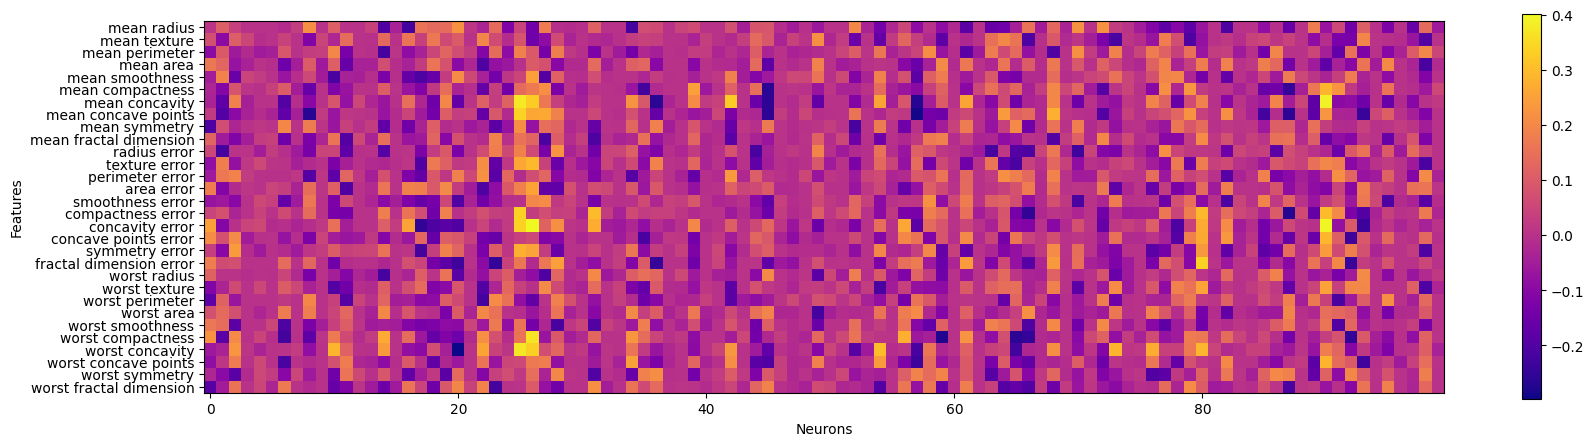

In [43]:
# Part 5 : One disadvantage of neural networks is that they are difficult to interpret. Still, on smaller networks, or on subsets of interest within a network, it is possible to observe the weights 
# and try to get some insight. Use the code below. 

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='plasma')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Neurons")
plt.ylabel("Features")
plt.colorbar()

In [44]:
pipeline.steps[1]

('mlpclassifier', MLPClassifier(max_iter=1000, random_state=0))

In [45]:
# Part 6 : There are many different parameters for MLPs. Use GridSearchCV or RandomizeSearchCV to explore different parameters and network structures.
from sklearn.model_selection import GridSearchCV

p = make_pipeline(StandardScaler(), MLPClassifier(random_state=0, max_iter=1000))
grid = {
    'mlpclassifier__hidden_layer_sizes' : [(100,), (200,), (200,50),
                                            (30, 10), (20, 10),
                                            (30, 15, 10,)
                                            ],
    'mlpclassifier__alpha' : [0.001, 0.01, 0.1, 1]
}

clf = GridSearchCV(p, grid, n_jobs=6) # cv = 5 by default
clf.fit(X_train, y_train)
print("Train: {}; Test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train: 1.0; Test: 0.951048951048951


In [46]:
print(clf.best_score_)
print(clf.best_params_)

0.98593707250342
{'mlpclassifier__alpha': 0.001, 'mlpclassifier__hidden_layer_sizes': (200, 50)}


In [47]:
# Part 7 : Use pipelines and parameter tuning to perform model selection between a Random Forest model and an MLP.


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


p2 = Pipeline([
    ('preprocessing', StandardScaler()), 
    ('classifier', MLPClassifier())
])


grid2 = [
    { # Neural netword scenario 
    'classifier' : [MLPClassifier(random_state=0, max_iter=1000)],
    'preprocessing' : [StandardScaler()],
    'classifier__hidden_layer_sizes' : [(100,), (200,), (200,50),
                                            (30, 10), (20, 10),
                                            (30, 15, 10,)
                                            ],
    'classifier__alpha' : [0.001, 0.01, 0.1, 1]
    },
    { # Random Forest scenario
    'classifier' : [RandomForestClassifier(random_state=0)],
    'preprocessing' : [None],
    'classifier__n_estimators' : [50, 100, 200, 400] 
    }
]

clf2 = GridSearchCV(p2, grid2, n_jobs=6)
clf2.fit(X_train, y_train)




GridSearchCV(estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', MLPClassifier())]),
             n_jobs=6,
             param_grid=[{'classifier': [MLPClassifier(max_iter=1000,
                                                       random_state=0)],
                          'classifier__alpha': [0.001, 0.01, 0.1, 1],
                          'classifier__hidden_layer_sizes': [(100,), (200,),
                                                             (200, 50),
                                                             (30, 10), (20, 10),
                                                             (30, 15, 10)],
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier(random_state=0)],
                          'classifier__n_estimators': [50, 100, 200, 400],
                          'preprocessing': [None]}])

## Question 3

In [48]:
# Part 1 : Scikit-Learn allows us to load data from openml.org. Here we will load a version of MNIST with smaller images (28x28 pixels, or 784 pixels).

from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)

print(X.shape, y.shape)

(70000, 784) (70000,)


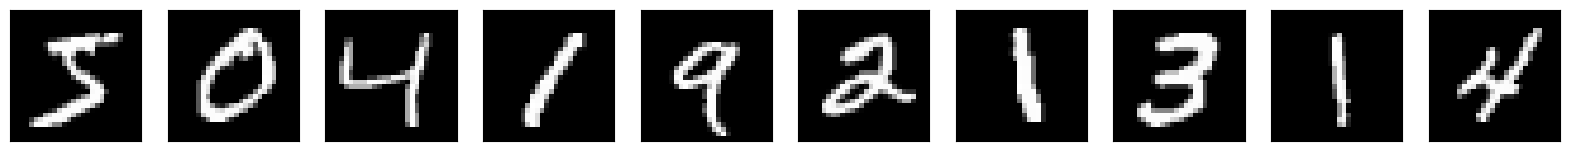

In [49]:
# Part 2 : We can view some of the images with the following code
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(20,2))
for image, ax in zip(X, axes.ravel()):
 ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
 ax.set_xticks(())
 ax.set_yticks(())
plt.show()

In [50]:
# Part 3 : Split the data into training and test sets. There are 70000 images. Usually 60000 are used for training and the rest for testing. However, training with that many images
# will take a lot of time, so set train_size=6000.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, test_size=10000, random_state=0)



In [65]:
# Part 4 : Train an MLP with 2 hidden layers, the first with 256 neurons, the second with 64 neurons. Evaluate its performance

p = Pipeline(steps =[ 
    ("scaler", StandardScaler()), 
    ("mlp", MLPClassifier(hidden_layer_sizes=(256, 64, ), max_iter=100, random_state=0))
                    ]
                    )

p.fit(X_train, y_train)

print("Train: {}; Test: {}".format(p.score(X_train, y_train), p.score(X_test, y_test)))

Train: 1.0; Test: 0.9398


In [75]:
mlp_coef = p.named_steps['mlp'].coefs_
mlp_intercepts = p.named_steps['mlp'].intercepts_

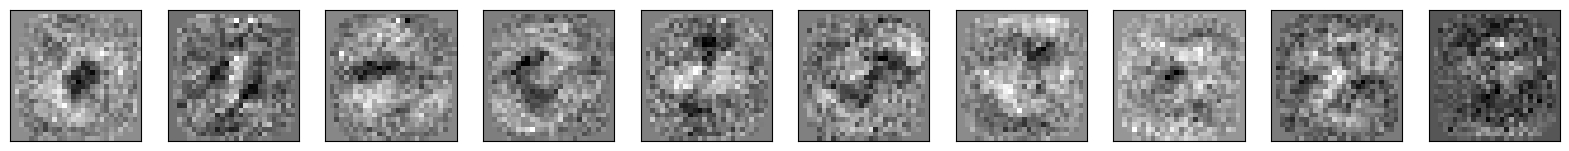

In [76]:
# Part 5 : Since we are using image data, we can try to reconstruct what each neuron detects using information from the neural network (coefficients and intercepts). The code 
# below allows us to observe the structures detected by the output neurons

import numpy as np
images_n0 = mlp_coef[0]+mlp_intercepts[0]
images_n1 = np.dot(images_n0, mlp_coef[1])+mlp_intercepts[1]
images_n2 = np.dot(images_n1, mlp_coef[2])+mlp_intercepts[2]
images = images_n2
fig, axes = plt.subplots(len(images.T)//10, 10, figsize=(20,20))
for image, ax in zip(images.T, axes.ravel()):
 ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
 ax.set_xticks(())
 ax.set_yticks(())
plt.show()

In [53]:
# Part 6 : Do we even need 2 hidden layers in the neural network? What would happen with no hidden layers? 
p = make_pipeline(
    StandardScaler(), 
    MLPClassifier(hidden_layer_sizes=(), 
                    max_iter=10000, 
                    random_state=0
                    ))

p.fit(X_train, y_train)

print("Train: {}; Test: {}".format(p.score(X_train, y_train), p.score(X_test, y_test)))

Train: 1.0; Test: 0.876


In [54]:
# Part 7 : Do we even need a neural network? What would happen with logistic regression?
from sklearn.linear_model import LogisticRegression

pLg = make_pipeline(StandardScaler(),
                    LogisticRegression())

pLg.fit(X_train, y_train)
print("Train: {}; Test: {}".format(pLg.score(X_train, y_train), pLg.score(X_test, y_test)))

Train: 1.0; Test: 0.884
